## RQ1


### Undefined services in Round1 and Round2

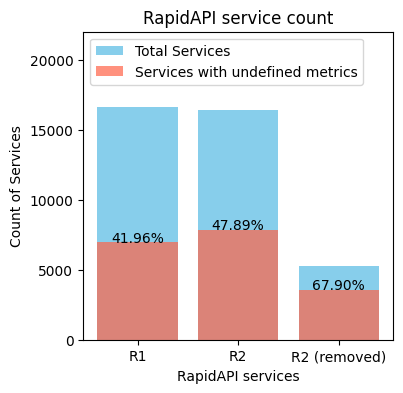

In [26]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to the first MySQL database (rapAPI)
conn1 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI'
)
cursor1 = conn1.cursor()

# Connect to the second MySQL database (rapAPI2)
conn2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)
cursor2 = conn2.cursor()

# Execute the first SQL query to count total base_url in rapAPI
total_query1 = """
SELECT COUNT(base_url) 
FROM api_info;
"""
cursor1.execute(total_query1)
total_count1 = cursor1.fetchone()[0]

# Execute the second SQL query to count base_url where popularity, latency, and service_level are all 0 in rapAPI
undefined_query1 = """
SELECT COUNT(base_url) 
FROM api_info 
WHERE popularity = 0 AND latency = 0 AND service_level = 0;
"""
cursor1.execute(undefined_query1)
undefined_count1 = cursor1.fetchone()[0]

# Execute the first SQL query to count total base_url in rapAPI2
total_query2 = """
SELECT COUNT(base_url) 
FROM api_info;
"""
cursor2.execute(total_query2)
total_count2 = cursor2.fetchone()[0]

# Execute the second SQL query to count base_url where popularity, latency, and service_level are all 0 in rapAPI2
undefined_query2 = """
SELECT COUNT(base_url) 
FROM api_info 
WHERE popularity = 0 AND latency = 0 AND service_level = 0;
"""
cursor2.execute(undefined_query2)
undefined_count2 = cursor2.fetchone()[0]



# Execute the first SQL query to count total base_url in rapAPI
total_query3 = """
 SELECT COUNT(base_url)  FROM rapAPI.api_info  WHERE base_url NOT IN (SELECT base_url FROM rapAPI2.api_info);

"""
cursor1.execute(total_query3)
total_count3 = cursor1.fetchone()[0]

# Execute the second SQL query to count base_url where popularity, latency, and service_level are all 0 in rapAPI
undefined_query3 = """
SELECT COUNT(base_url)  FROM rapAPI.api_info  WHERE popularity = 0  AND latency = 0  AND service_level = 0  AND base_url NOT IN (SELECT base_url FROM rapAPI2.api_info);
"""
cursor1.execute(undefined_query3)
undefined_count3 = cursor1.fetchone()[0]

# Close the cursors and connections
cursor1.close()
conn1.close()
cursor2.close()
conn2.close()

plt.figure(figsize=(4, 4))  # Adjust figure size

# Plot the graph
labels = ['R1', 'R2', 'R2 (removed)']
counts = [total_count1, total_count2, total_count3]
undefined_counts = [undefined_count1, undefined_count2, undefined_count3]

total_counts_with_undefined = counts + undefined_counts
# Calculate percentages of services with undefined metrics
percentage_undefined1 = (undefined_count1 / total_count1) * 100
percentage_undefined2 = (undefined_count2 / total_count2) * 100
percentage_undefined3 = (undefined_count3 / total_count3) * 100

# Define the labels for the undefined counts
undefined_labels = [f"Undefined Count (rapAPI): {percentage_undefined1:.2f}%", f"Undefined Count (rapAPI2): {percentage_undefined2:.2f}%", f"Undefined Count (rapAPI2): {percentage_undefined3:.2f}%"]

# Plot the bar graph with percentages on the bars
plt.bar(labels, counts, color='skyblue', label='Total Services')
plt.bar(labels, undefined_counts, color='tomato', alpha=0.7, label='Services with undefined metrics')

# Add percentages as text on the bars
for i, count in enumerate(undefined_counts):
    plt.text(i, count + 0.5, f"{percentage_undefined1 if i == 0 else percentage_undefined2 if i == 1 else percentage_undefined3:.2f}%", ha='center', fontsize=10)

plt.xlabel('RapidAPI services')
plt.ylabel('Count of Services')
plt.title('RapidAPI service count')
plt.legend(loc='upper left')
plt.ylim(0, 22000)
plt.yticks(range(0, 20001, 5000))
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPIServiceCounts.pdf', format='pdf')

plt.show()


17539


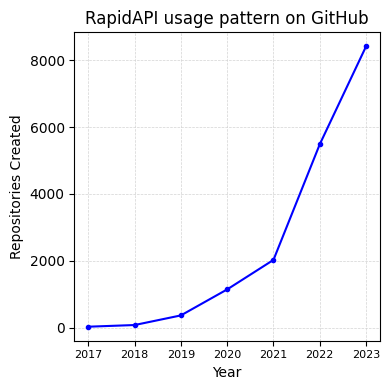

In [1]:
import matplotlib.pyplot as plt

# Data
years =[2017,2018,2019,2020,2021, 2022,2023]  #2011,2012,2013,2014,2015,2016,
repositories_created =  [27, 77, 365, 1143, 2026, 5486, 8415]#, 1945] [1, 3, 24, 5, 28, 42,
print(sum(repositories_created))
# Create incremental line graph
plt.figure(figsize=(4, 4))
plt.plot(years, repositories_created, marker='.', linestyle='-', color = 'blue')

# Title and labels
plt.title('RapidAPI usage pattern on GitHub')
plt.xlabel('Year')
plt.ylabel('Repositories Created')
plt.xticks(years, fontsize=8)
# plt.grid(True)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')

plt.tight_layout()
plt.savefig(r'D:\RapidAPI\RapidAPI\GitHub_Repository_RapidAPI.pdf', format='pdf')
plt.show()


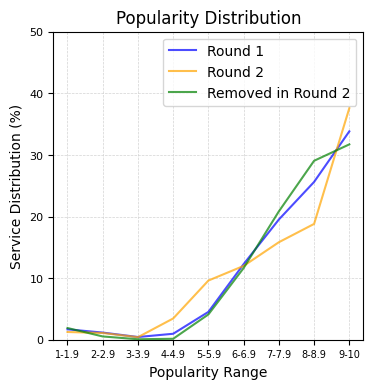

In [12]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL for rapAPI
cnx_rapAPI = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI = cnx_rapAPI.cursor()

# Connect to MySQL for rapAPI2
cnx_rapAPI2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Execute the query to select popularity ranges and count of services within each range for rapAPI
query_rapAPI = """
    SELECT 
    CASE
        WHEN popularity >= 1 AND popularity < 2 THEN '1-1.9'
        WHEN popularity >= 2 AND popularity < 3 THEN '2-2.9'
        WHEN popularity >= 3 AND popularity < 4 THEN '3-3.9'
        WHEN popularity >= 4 AND popularity < 5 THEN '4-4.9'
        WHEN popularity >= 5 AND popularity < 6 THEN '5-5.9'
        WHEN popularity >= 6 AND popularity < 7 THEN '6-6.9'
        WHEN popularity >= 7 AND popularity < 8 THEN '7-7.9'
        WHEN popularity >= 8 AND popularity < 9 THEN '8-8.9'
        WHEN popularity >= 9 AND popularity <= 10 THEN '9-10'
    END AS popularity_range,
    COUNT(*) AS service_count 
FROM 
    api_info 
WHERE 
    popularity BETWEEN 0 AND 11 
GROUP BY 
    popularity_range
ORDER BY
    popularity_range;
"""
cursor_rapAPI.execute(query_rapAPI)
popularity_data_rapAPI = cursor_rapAPI.fetchall()

# Execute the query to select popularity ranges and count of services within each range for rapAPI2
query_rapAPI2 = """
    SELECT 
    CASE
        WHEN popularity >= 1 AND popularity < 2 THEN '1-1.9'
        WHEN popularity >= 2 AND popularity < 3 THEN '2-2.9'
        WHEN popularity >= 3 AND popularity < 4 THEN '3-3.9'
        WHEN popularity >= 4 AND popularity < 5 THEN '4-4.9'
        WHEN popularity >= 5 AND popularity < 6 THEN '5-5.9'
        WHEN popularity >= 6 AND popularity < 7 THEN '6-6.9'
        WHEN popularity >= 7 AND popularity < 8 THEN '7-7.9'
        WHEN popularity >= 8 AND popularity < 9 THEN '8-8.9'
        WHEN popularity >= 9 AND popularity <= 10 THEN '9-10'
    END AS popularity_range,
    COUNT(*) AS service_count 
FROM 
    api_info 
WHERE 
    popularity BETWEEN 0 AND 11 
GROUP BY 
    popularity_range
ORDER BY
    popularity_range;
"""
cursor_rapAPI2.execute(query_rapAPI2)
popularity_data_rapAPI2 = cursor_rapAPI2.fetchall()

query_removed = """
    SELECT
    CASE
        WHEN popularity >= 1 AND popularity < 2 THEN '1-1.9'
        WHEN popularity >= 2 AND popularity < 3 THEN '2-2.9'
        WHEN popularity >= 3 AND popularity < 4 THEN '3-3.9'
        WHEN popularity >= 4 AND popularity < 5 THEN '4-4.9'
        WHEN popularity >= 5 AND popularity < 6 THEN '5-5.9'
        WHEN popularity >= 6 AND popularity < 7 THEN '6-6.9'
        WHEN popularity >= 7 AND popularity < 8 THEN '7-7.9'
        WHEN popularity >= 8 AND popularity < 9 THEN '8-8.9'
        WHEN popularity >= 9 AND popularity <= 10 THEN '9-10'
    END AS popularity_range,
    COUNT(*) AS popularity_count
FROM
    rapAPI.aboutPage
JOIN
    rapAPI.api_info ON rapAPI.aboutPage.base_url = rapAPI.api_info.base_url
WHERE
    rapAPI.aboutPage.base_url NOT IN (
        SELECT base_url FROM rapAPI2.aboutPage WHERE base_url IS NOT NULL
    )
GROUP BY
    popularity_range
ORDER BY
    popularity_range
"""
cursor_rapAPI2.execute(query_removed)
popularity_data_removed = cursor_rapAPI2.fetchall()

# Extract popularity ranges and service count values from the result for rapAPI
popularity_ranges_rapAPI = []
service_count_values_rapAPI = []
for row in popularity_data_rapAPI:
    if row[0] is not None:
        popularity_ranges_rapAPI.append(row[0])
        service_count_values_rapAPI.append(row[1])

# Extract popularity ranges and service count values from the result for rapAPI2
popularity_ranges_rapAPI2 = []
service_count_values_rapAPI2 = []
for row in popularity_data_rapAPI2:
    if row[0] is not None:
        popularity_ranges_rapAPI2.append(row[0])
        service_count_values_rapAPI2.append(row[1])
        
        
# Extract popularity ranges and service count values from the result for rapAPI2
popularity_ranges_removed = []
service_count_values_removed = []
for row in popularity_data_removed:
    if row[0] is not None:
        popularity_ranges_removed.append(row[0])
        service_count_values_removed.append(row[1])


# Calculate total counts for each round
total_rapAPI = sum(service_count_values_rapAPI)
total_rapAPI2 = sum(service_count_values_rapAPI2)
total_removed = sum(service_count_values_removed)

# Calculate percentages for each round
percentage_rapAPI = [count / total_rapAPI * 100 for count in service_count_values_rapAPI]
percentage_rapAPI2 = [count / total_rapAPI2 * 100 for count in service_count_values_rapAPI2]
percentage_removed = [count / total_removed * 100 for count in service_count_values_removed]

# Plotting
plt.figure(figsize=(4, 4))

# Create bar plot for rapAPI
plt.plot(popularity_ranges_rapAPI, percentage_rapAPI, color='blue', alpha=0.7, label='Round 1')

# Create bar plot for rapAPI2
plt.plot(popularity_ranges_rapAPI2, percentage_rapAPI2, color='orange', alpha=0.7, label='Round 2')

# Create bar plot for removed services
plt.plot(popularity_ranges_removed, percentage_removed, color='green', alpha=0.7, label='Removed in Round 2')

plt.ylim(0, 50)
plt.yticks(range(0, 51, 10))
# Add labels and title
plt.xlabel('Popularity Range')
plt.ylabel('Service Distribution (%)')
plt.title('Popularity Distribution')
plt.legend()
plt.xticks(fontsize=7)
plt.yticks(fontsize=8)
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_Popularity.pdf', format='pdf')

plt.show()

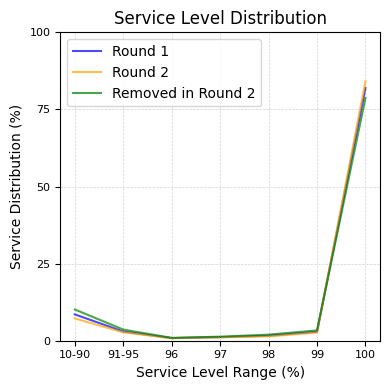

In [13]:
import matplotlib.pyplot as plt
import mysql.connector


def sorting_key(x):
    if x[0] == '100%':
        return 100
    else:
        return float(x[0].split('-')[0].rstrip('%')) 

# Connect to rapAPI database
cnx_rapAPI = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI = cnx_rapAPI.cursor()

# Execute the query to select service level ranges and count of services within each range for rapAPI
query_rapAPI = """
    SELECT 
        CASE
            WHEN service_level >= 10 AND service_level < 91 THEN '10-90'
            WHEN service_level >= 91 AND service_level < 96 THEN '91-95'
            WHEN service_level >= 96 AND service_level < 97 THEN '96'
            WHEN service_level >= 97 AND service_level < 98 THEN '97'
            WHEN service_level >= 98 AND service_level < 99 THEN '98'
            WHEN service_level >= 99 AND service_level < 100 THEN '99'
            WHEN service_level = 100 THEN '100'
        END AS service_level_range,
        COUNT(*) AS service_count 
    FROM 
        api_info 
    WHERE 
        service_level BETWEEN 0 AND 101 
    GROUP BY 
        service_level_range
"""
cursor_rapAPI.execute(query_rapAPI)
service_level_data_rapAPI = cursor_rapAPI.fetchall()

# Extract service level ranges and service count values from the result for rapAPI
service_level_ranges_rapAPI = []
service_count_values_rapAPI = []
for row in service_level_data_rapAPI:
    if row[0] is not None:
        service_level_ranges_rapAPI.append(row[0])
        service_count_values_rapAPI.append(row[1])

# Sort the service level ranges and service count values together for rapAPI
sorted_data_rapAPI = sorted(zip(service_level_ranges_rapAPI, service_count_values_rapAPI), key=sorting_key)
service_level_ranges_sorted_rapAPI, service_count_values_sorted_rapAPI = zip(*sorted_data_rapAPI)

# Close the cursor and connection for rapAPI
cursor_rapAPI.close()
cnx_rapAPI.close()

# Connect to rapAPI2 database
cnx_rapAPI2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Execute the query to select service level ranges and count of services within each range for rapAPI2
query_rapAPI2 = """
    SELECT 
        CASE
            WHEN service_level >= 10 AND service_level < 91 THEN '10-90'
            WHEN service_level >= 91 AND service_level < 96 THEN '91-95'
            WHEN service_level >= 96 AND service_level < 97 THEN '96'
            WHEN service_level >= 97 AND service_level < 98 THEN '97'
            WHEN service_level >= 98 AND service_level < 99 THEN '98'
            WHEN service_level >= 99 AND service_level < 100 THEN '99'
            WHEN service_level = 100 THEN '100'
        END AS service_level_range,
        COUNT(*) AS service_count 
    FROM 
        api_info 
    WHERE 
        service_level BETWEEN 0 AND 101 
    GROUP BY 
        service_level_range
"""
cursor_rapAPI2.execute(query_rapAPI2)
service_level_data_rapAPI2 = cursor_rapAPI2.fetchall()

# Extract service level ranges and service count values from the result for rapAPI2
service_level_ranges_rapAPI2 = []
service_count_values_rapAPI2 = []
for row in service_level_data_rapAPI2:
    if row[0] is not None:
        service_level_ranges_rapAPI2.append(row[0])
        service_count_values_rapAPI2.append(row[1])

# Sort the service level ranges and service count values together for rapAPI2
sorted_data_rapAPI2 = sorted(zip(service_level_ranges_rapAPI2, service_count_values_rapAPI2), key=sorting_key)
service_level_ranges_sorted_rapAPI2, service_count_values_sorted_rapAPI2 = zip(*sorted_data_rapAPI2)







# Execute the query to select service level ranges and count of services within each range for rapAPI2
query_rapAPI2_removed = """
    SELECT 
        CASE
            WHEN service_level >= 10 AND service_level < 91 THEN '10-90'
            WHEN service_level >= 91 AND service_level < 96 THEN '91-95'
            WHEN service_level >= 96 AND service_level < 97 THEN '96'
            WHEN service_level >= 97 AND service_level < 98 THEN '97'
            WHEN service_level >= 98 AND service_level < 99 THEN '98'
            WHEN service_level >= 99 AND service_level < 100 THEN '99'
            WHEN service_level = 100 THEN '100'
        END AS service_range,
    COUNT(*) AS service_count
FROM
    rapAPI.aboutPage
JOIN
    rapAPI.api_info ON rapAPI.aboutPage.base_url = rapAPI.api_info.base_url
WHERE
    rapAPI.aboutPage.base_url NOT IN (
        SELECT base_url FROM rapAPI2.aboutPage WHERE base_url IS NOT NULL
    )
GROUP BY
    service_range
ORDER BY
    service_range
"""
cursor_rapAPI2.execute(query_rapAPI2_removed)
service_level_data_removed = cursor_rapAPI2.fetchall()

# Extract service level ranges and service count values from the result for rapAPI2
service_level_ranges_rapAPI2_removed = []
service_count_values_rapAPI2_removed = []
for row in service_level_data_removed:
    if row[0] is not None:
        service_level_ranges_rapAPI2_removed.append(row[0])
        service_count_values_rapAPI2_removed.append(row[1])

# Sort the service level ranges and service count values together for rapAPI2
sorted_data_rapAPI2_removed = sorted(zip(service_level_ranges_rapAPI2_removed, service_count_values_rapAPI2_removed), key=sorting_key)
service_level_ranges_sorted_rapAPI2_removed, service_count_values_sorted_rapAPI2_removed = zip(*sorted_data_rapAPI2_removed)





# Close the cursor and connection for rapAPI2
cursor_rapAPI2.close()
cnx_rapAPI2.close()

# Combine data from both databases for plotting
combined_service_level_ranges = list(service_level_ranges_sorted_rapAPI) + list(service_level_ranges_sorted_rapAPI2) + list(service_level_ranges_sorted_rapAPI2_removed)
combined_service_count_values = list(service_count_values_sorted_rapAPI) + list(service_count_values_sorted_rapAPI2) + list(service_count_values_sorted_rapAPI2_removed)

# Calculate total counts for each round
total_rapAPI = sum(service_count_values_sorted_rapAPI)
total_rapAPI2 = sum(service_count_values_sorted_rapAPI2)
total_removed = sum(service_count_values_sorted_rapAPI2_removed)

# Calculate percentages for each round
percentage_rapAPI = [count / total_rapAPI * 100 for count in service_count_values_sorted_rapAPI]
percentage_rapAPI2 = [count / total_rapAPI2 * 100 for count in service_count_values_sorted_rapAPI2]
percentage_removed = [count / total_removed * 100 for count in service_count_values_sorted_rapAPI2_removed]

plt.figure(figsize=(4, 4))

# Create bar plot for rapAPI
plt.plot(service_level_ranges_sorted_rapAPI, percentage_rapAPI, color='blue', alpha=0.7, label='Round 1')

# Create bar plot for rapAPI2
plt.plot(service_level_ranges_sorted_rapAPI2, percentage_rapAPI2, color='orange', alpha=0.7, label='Round 2')

# Create bar plot for removed services in rapAPI2
plt.plot(service_level_ranges_sorted_rapAPI2_removed, percentage_removed, color='green', alpha=0.7, label='Removed in Round 2')

# Add labels and title
plt.xlabel('Service Level Range (%)')
plt.ylabel('Service Distribution (%)')
plt.title('Service Level Distribution')
plt.ylim(0, 100)
plt.yticks(range(0, 101, 25))
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8) 

plt.tight_layout()

plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_ServiceLevel.pdf', format='pdf')

plt.show()


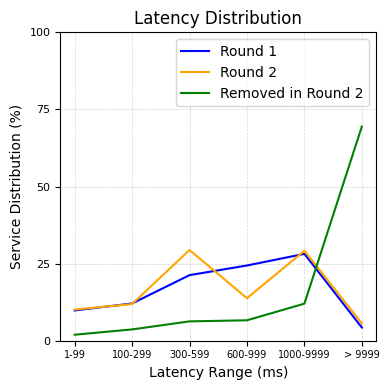

In [14]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL - rapAPI
cnx_rapAPI = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI = cnx_rapAPI.cursor()

# Execute the query to select latency ranges and count of services within each range for rapAPI
query = """
    SELECT 
        CASE
            WHEN latency >= 1 AND latency < 100 THEN '1-99'
            WHEN latency >= 100 AND latency < 300 THEN '100-299'
            WHEN latency >= 300 AND latency < 600 THEN '300-599'
            WHEN latency >= 600 AND latency < 1000 THEN '600-999'
            WHEN latency >= 1000 AND latency < 10000 THEN '1000-9999'
            ELSE '> 9999'
        END AS latency_range,
        COUNT(*) AS service_count 
    FROM 
        api_info 
    WHERE 
        latency > 0 AND latency < 100000
    GROUP BY 
        latency_range
"""
cursor_rapAPI.execute(query)
latency_data_rapAPI = cursor_rapAPI.fetchall()

# Extract latency ranges and service count values from the result for rapAPI
latency_ranges_rapAPI = []
service_count_values_rapAPI = []
for latency_range, service_count in latency_data_rapAPI:
    if latency_range is not None:  
        latency_ranges_rapAPI.append(latency_range)
        service_count_values_rapAPI.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI
latency_ranges_sorted_rapAPI = ['1-99', '100-299', '300-599', '600-999', '1000-9999', '> 9999']
service_count_values_sorted_rapAPI = [service_count_values_rapAPI[latency_ranges_rapAPI.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI]

# Close connection to rapAPI
cursor_rapAPI.close()
cnx_rapAPI.close()

# Connect to MySQL - rapAPI2
cnx_rapAPI2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Execute the same query for rapAPI2 database
cursor_rapAPI2.execute(query)
latency_data_rapAPI2 = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2 = []
service_count_values_rapAPI2 = []
for latency_range, service_count in latency_data_rapAPI2:
    if latency_range is not None:  
        latency_ranges_rapAPI2.append(latency_range)
        service_count_values_rapAPI2.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2 = ['1-99', '100-299', '300-599', '600-999', '1000-9999', '> 9999']
service_count_values_sorted_rapAPI2 = [service_count_values_rapAPI2[latency_ranges_rapAPI2.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2]


query_removed = """
    SELECT
        CASE
            WHEN latency >= 1 AND latency < 100 THEN '1-99'
            WHEN latency >= 100 AND latency < 300 THEN '100-299'
            WHEN latency >= 300 AND latency < 600 THEN '300-599'
            WHEN latency >= 600 AND latency < 1000 THEN '600-999'
            WHEN latency >= 1000 AND latency < 10000 THEN '1000-9999'
            ELSE '> 9999'
    END AS latency_range,
    COUNT(*) AS latency_count
FROM
    rapAPI.aboutPage
JOIN
    rapAPI.api_info ON rapAPI.aboutPage.base_url = rapAPI.api_info.base_url
WHERE
    rapAPI.aboutPage.base_url NOT IN (
        SELECT base_url FROM rapAPI2.aboutPage WHERE base_url IS NOT NULL
    ) AND api_info.latency < 10000
GROUP BY
    latency_range
"""

cursor_rapAPI2.execute(query_removed)
latency_data_rapAPI2_removed = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2_removed = []
service_count_values_rapAPI2_removed = []
for latency_range, service_count in latency_data_rapAPI2_removed:
    if latency_range is not None:  
        latency_ranges_rapAPI2_removed.append(latency_range)
        service_count_values_rapAPI2_removed.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2_removed = ['1-99', '100-299', '300-599', '600-999', '1000-9999', '> 9999']
service_count_values_sorted_rapAPI2_removed = [service_count_values_rapAPI2_removed[latency_ranges_rapAPI2_removed.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2_removed]


# Calculate total counts for each round
total_rapAPI = sum(service_count_values_sorted_rapAPI)
total_rapAPI2 = sum(service_count_values_sorted_rapAPI2)
total_removed = sum(service_count_values_sorted_rapAPI2_removed)

# Calculate percentages for each round
percentage_rapAPI = [count / total_rapAPI * 100 for count in service_count_values_sorted_rapAPI]
percentage_rapAPI2 = [count / total_rapAPI2 * 100 for count in service_count_values_sorted_rapAPI2]
percentage_removed = [count / total_removed * 100 for count in service_count_values_sorted_rapAPI2_removed]

# Plot graph
plt.figure(figsize=(4, 4))

# Create line graph for rapAPI
plt.plot(latency_ranges_sorted_rapAPI, percentage_rapAPI, color='blue', linestyle='-', label='Round 1')

# Create line graph for rapAPI2
plt.plot(latency_ranges_sorted_rapAPI2, percentage_rapAPI2, color='orange', linestyle='-', label='Round 2')

plt.plot(latency_ranges_sorted_rapAPI2_removed, percentage_removed, color='green', linestyle='-', label='Removed in Round 2')

# Add labels and title
plt.xlabel('Latency Range (ms)')
plt.ylabel('Service Distribution (%)')
plt.title('Latency Distribution')

# Set y-axis limit
plt.ylim(0, 100)
plt.yticks(range(0, 101, 25))

# Show plot
plt.xticks(fontsize=7) 
plt.yticks(fontsize=8) 

plt.tight_layout()  
plt.legend()  
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_Latency.pdf', format='pdf')


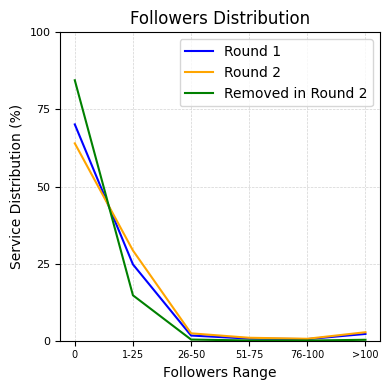

In [15]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL - rapAPI
cnx_rapAPI = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI = cnx_rapAPI.cursor()

# Execute the query to select latency ranges and count of services within each range for rapAPI
query = """
    SELECT 
        CASE
            WHEN ad.followers = 0 THEN '0'
            WHEN ad.followers >= 1 AND ad.followers < 26 THEN '1-25'
            WHEN ad.followers >= 26 AND ad.followers < 51 THEN '26-50'
            WHEN ad.followers >= 51 AND ad.followers < 76 THEN '51-75'
            WHEN ad.followers >= 76 AND ad.followers < 101 THEN '76-100'
            WHEN ad.followers > 100 THEN '>100'
        END AS followers_range,
        COUNT(*) AS service_count 
    FROM 
        api_details ad 
    GROUP BY 
        followers_range
"""
cursor_rapAPI.execute(query)
latency_data_rapAPI = cursor_rapAPI.fetchall()

# Extract latency ranges and service count values from the result for rapAPI
latency_ranges_rapAPI = []
service_count_values_rapAPI = []
for latency_range, service_count in latency_data_rapAPI:
    if latency_range is not None:  
        latency_ranges_rapAPI.append(latency_range)
        service_count_values_rapAPI.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI
latency_ranges_sorted_rapAPI = ['0', '1-25', '26-50', '51-75', '76-100', '>100']
service_count_values_sorted_rapAPI = [service_count_values_rapAPI[latency_ranges_rapAPI.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI]

# Close connection to rapAPI
cursor_rapAPI.close()
cnx_rapAPI.close()

# Connect to MySQL - rapAPI2
cnx_rapAPI2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='xxx'
)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Execute the same query for rapAPI2 database
cursor_rapAPI2.execute(query)
latency_data_rapAPI2 = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2 = []
service_count_values_rapAPI2 = []
for latency_range, service_count in latency_data_rapAPI2:
    if latency_range is not None:  
        latency_ranges_rapAPI2.append(latency_range)
        service_count_values_rapAPI2.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2 = ['0', '1-25', '26-50', '51-75', '76-100', '>100']
service_count_values_sorted_rapAPI2 = [service_count_values_rapAPI2[latency_ranges_rapAPI2.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2]


query_removed = """
    SELECT
    CASE
            WHEN ad.followers = 0 THEN '0'
            WHEN ad.followers >= 1 AND ad.followers < 26 THEN '1-25'
            WHEN ad.followers >= 26 AND ad.followers < 51 THEN '26-50'
            WHEN ad.followers >= 51 AND ad.followers < 76 THEN '51-75'
            WHEN ad.followers >= 76 AND ad.followers < 101 THEN '76-100'
            WHEN ad.followers > 100 THEN '>100'
    END AS followers_range,
    COUNT(*) AS latency_count
FROM
    rapAPI.api_details ad
WHERE
    ad.base_url NOT IN (
        SELECT base_url FROM rapAPI2.api_details WHERE base_url IS NOT NULL
    ) 
GROUP BY
    followers_range;

"""

cursor_rapAPI2.execute(query_removed)
latency_data_rapAPI2_removed = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2_removed = []
service_count_values_rapAPI2_removed = []
for latency_range, service_count in latency_data_rapAPI2_removed:
    if latency_range is not None:  
        latency_ranges_rapAPI2_removed.append(latency_range)
        service_count_values_rapAPI2_removed.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2_removed = ['0', '1-25', '26-50', '51-75', '76-100', '>100']
service_count_values_sorted_rapAPI2_removed = [service_count_values_rapAPI2_removed[latency_ranges_rapAPI2_removed.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2_removed]


# Calculate total counts for each round
total_rapAPI = sum(service_count_values_sorted_rapAPI)
total_rapAPI2 = sum(service_count_values_sorted_rapAPI2)
total_removed = sum(service_count_values_sorted_rapAPI2_removed)

# Calculate percentages for each round
percentage_rapAPI = [count / total_rapAPI * 100 for count in service_count_values_sorted_rapAPI]
percentage_rapAPI2 = [count / total_rapAPI2 * 100 for count in service_count_values_sorted_rapAPI2]
percentage_removed = [count / total_removed * 100 for count in service_count_values_sorted_rapAPI2_removed]

# Plot graph
plt.figure(figsize=(4, 4))

# Create line graph for rapAPI
plt.plot(latency_ranges_sorted_rapAPI, percentage_rapAPI, color='blue', linestyle='-', label='Round 1')

# Create line graph for rapAPI2
plt.plot(latency_ranges_sorted_rapAPI2, percentage_rapAPI2, color='orange', linestyle='-', label='Round 2')

plt.plot(latency_ranges_sorted_rapAPI2_removed, percentage_removed, color='green', linestyle='-', label='Removed in Round 2')

# Add labels and title
plt.xlabel('Followers Range')
plt.ylabel('Service Distribution (%)')
plt.title('Followers Distribution')

# Set y-axis limit
plt.ylim(0, 100)
plt.yticks(range(0, 101, 25))

# Show plot
plt.xticks(fontsize=7) 
plt.yticks(fontsize=8) 

plt.tight_layout()  
plt.legend()  
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_Followers.pdf', format='pdf')


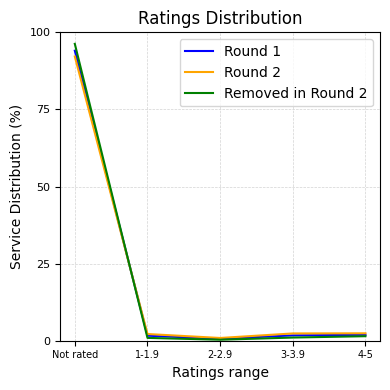

In [35]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL - rapAPI
cnx_rapAPI = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI'
)
cursor_rapAPI = cnx_rapAPI.cursor()

# Execute the query to select latency ranges and count of services within each range for rapAPI
query = """
    SELECT 
        CASE
            WHEN ad.ratings = 5 THEN 'Not rated'
            WHEN ad.ratings >= 1 AND ad.ratings < 2 THEN '1-1.9'
            WHEN ad.ratings >= 2 AND ad.ratings < 3 THEN '2-2.9'
            WHEN ad.ratings >= 3 AND ad.ratings < 4 THEN '3-3.9'
            WHEN ad.ratings >= 4 AND ad.ratings < 5 THEN '4-5'
        END AS ratings_range,
        COUNT(*) AS service_count 
    FROM 
        api_details ad 
    GROUP BY 
        ratings_range
"""
cursor_rapAPI.execute(query)
latency_data_rapAPI = cursor_rapAPI.fetchall()

# Extract latency ranges and service count values from the result for rapAPI
latency_ranges_rapAPI = []
service_count_values_rapAPI = []
for latency_range, service_count in latency_data_rapAPI:
    if latency_range is not None:  
        latency_ranges_rapAPI.append(latency_range)
        service_count_values_rapAPI.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI
latency_ranges_sorted_rapAPI = ['Not rated', '1-1.9', '2-2.9', '3-3.9', '4-5']
service_count_values_sorted_rapAPI = [service_count_values_rapAPI[latency_ranges_rapAPI.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI]

# Close connection to rapAPI
cursor_rapAPI.close()
cnx_rapAPI.close()

# Connect to MySQL - rapAPI2
cnx_rapAPI2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Execute the same query for rapAPI2 database
cursor_rapAPI2.execute(query)
latency_data_rapAPI2 = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2 = []
service_count_values_rapAPI2 = []
for latency_range, service_count in latency_data_rapAPI2:
    if latency_range is not None:  
        latency_ranges_rapAPI2.append(latency_range)
        service_count_values_rapAPI2.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2 = ['Not rated', '1-1.9', '2-2.9', '3-3.9', '4-5']
service_count_values_sorted_rapAPI2 = [service_count_values_rapAPI2[latency_ranges_rapAPI2.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2]


query_removed = """
   SELECT 
        CASE
            WHEN ad.ratings = 5 THEN 'Not rated'
            WHEN ad.ratings >= 1 AND ad.ratings < 2 THEN '1-1.9'
            WHEN ad.ratings >= 2 AND ad.ratings < 3 THEN '2-2.9'
            WHEN ad.ratings >= 3 AND ad.ratings < 4 THEN '3-3.9'
            WHEN ad.ratings >= 4 AND ad.ratings < 5 THEN '4-5'
            
        END AS ratings_range,
    COUNT(*) AS latency_count
FROM
    rapAPI.api_details ad
WHERE
    ad.base_url NOT IN (
        SELECT base_url FROM rapAPI2.api_details WHERE base_url IS NOT NULL
    ) 
GROUP BY
    ratings_range;

"""

cursor_rapAPI2.execute(query_removed)
latency_data_rapAPI2_removed = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2_removed = []
service_count_values_rapAPI2_removed = []
for latency_range, service_count in latency_data_rapAPI2_removed:
    if latency_range is not None:  
        latency_ranges_rapAPI2_removed.append(latency_range)
        service_count_values_rapAPI2_removed.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2_removed = ['Not rated', '1-1.9', '2-2.9', '3-3.9', '4-5']
service_count_values_sorted_rapAPI2_removed = [service_count_values_rapAPI2_removed[latency_ranges_rapAPI2_removed.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2_removed]


# Calculate total counts for each round
total_rapAPI = sum(service_count_values_sorted_rapAPI)
total_rapAPI2 = sum(service_count_values_sorted_rapAPI2)
total_removed = sum(service_count_values_sorted_rapAPI2_removed)

# Calculate percentages for each round
percentage_rapAPI = [count / total_rapAPI * 100 for count in service_count_values_sorted_rapAPI]
percentage_rapAPI2 = [count / total_rapAPI2 * 100 for count in service_count_values_sorted_rapAPI2]
percentage_removed = [count / total_removed * 100 for count in service_count_values_sorted_rapAPI2_removed]

# Plot graph
plt.figure(figsize=(4, 4))

# Create line graph for rapAPI
plt.plot(latency_ranges_sorted_rapAPI, percentage_rapAPI, color='blue', linestyle='-', label='Round 1')

# Create line graph for rapAPI2
plt.plot(latency_ranges_sorted_rapAPI2, percentage_rapAPI2, color='orange', linestyle='-', label='Round 2')

plt.plot(latency_ranges_sorted_rapAPI2_removed, percentage_removed, color='green', linestyle='-', label='Removed in Round 2')

# Add labels and title
plt.xlabel('Ratings range')
plt.ylabel('Service Distribution (%)')
plt.title('Ratings Distribution')

# Set y-axis limit
plt.ylim(0, 100)
plt.yticks(range(0, 101, 25))

# Show plot
plt.xticks(fontsize=7) 
plt.yticks(fontsize=8) 

plt.tight_layout()  
plt.legend()  
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_Ratings.pdf', format='pdf')


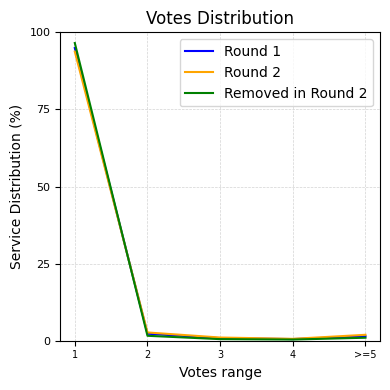

In [14]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL - rapAPI
cnx_rapAPI = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI'
)
cursor_rapAPI = cnx_rapAPI.cursor()

# Execute the query to select latency ranges and count of services within each range for rapAPI
query = """
    SELECT 
        CASE
            WHEN ad.votes = 1 THEN '1'
            WHEN ad.votes = 2 THEN '2'
            WHEN ad.votes = 3 THEN '3'
            WHEN ad.votes = 4 THEN '4'
            WHEN ad.votes >= 5 THEN '>=5'
        END AS votes_range,
        COUNT(*) AS service_count 
    FROM 
        api_details ad 
    GROUP BY 
        votes_range
"""
cursor_rapAPI.execute(query)
latency_data_rapAPI = cursor_rapAPI.fetchall()

# Extract latency ranges and service count values from the result for rapAPI
latency_ranges_rapAPI = []
service_count_values_rapAPI = []
for latency_range, service_count in latency_data_rapAPI:
    if latency_range is not None:  
        latency_ranges_rapAPI.append(latency_range)
        service_count_values_rapAPI.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI
latency_ranges_sorted_rapAPI = ['1', '2', '3', '4', '>=5']
service_count_values_sorted_rapAPI = [service_count_values_rapAPI[latency_ranges_rapAPI.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI]

# Close connection to rapAPI
cursor_rapAPI.close()
cnx_rapAPI.close()

# Connect to MySQL - rapAPI2
cnx_rapAPI2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Execute the same query for rapAPI2 database
cursor_rapAPI2.execute(query)
latency_data_rapAPI2 = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2 = []
service_count_values_rapAPI2 = []
for latency_range, service_count in latency_data_rapAPI2:
    if latency_range is not None:  
        latency_ranges_rapAPI2.append(latency_range)
        service_count_values_rapAPI2.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2 = ['1', '2', '3', '4', '>=5']
service_count_values_sorted_rapAPI2 = [service_count_values_rapAPI2[latency_ranges_rapAPI2.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2]


query_removed = """
   SELECT 
        CASE
            WHEN ad.votes = 1 THEN '1'
            WHEN ad.votes = 2 THEN '2'
            WHEN ad.votes = 3 THEN '3'
            WHEN ad.votes = 4 THEN '4'
            WHEN ad.votes >= 5 THEN '>=5'
        END AS votes_range,
    COUNT(*) AS latency_count
FROM
    rapAPI.api_details ad
WHERE
    ad.base_url NOT IN (
        SELECT base_url FROM rapAPI2.api_details WHERE base_url IS NOT NULL
    ) 
GROUP BY
    votes_range;

"""

cursor_rapAPI2.execute(query_removed)
latency_data_rapAPI2_removed = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2_removed = []
service_count_values_rapAPI2_removed = []
for latency_range, service_count in latency_data_rapAPI2_removed:
    if latency_range is not None:  
        latency_ranges_rapAPI2_removed.append(latency_range)
        service_count_values_rapAPI2_removed.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2_removed = ['1', '2', '3', '4', '>=5']
service_count_values_sorted_rapAPI2_removed = [service_count_values_rapAPI2_removed[latency_ranges_rapAPI2_removed.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2_removed]


# Calculate total counts for each round
total_rapAPI = sum(service_count_values_sorted_rapAPI)
total_rapAPI2 = sum(service_count_values_sorted_rapAPI2)
total_removed = sum(service_count_values_sorted_rapAPI2_removed)

# Calculate percentages for each round
percentage_rapAPI = [count / total_rapAPI * 100 for count in service_count_values_sorted_rapAPI]
percentage_rapAPI2 = [count / total_rapAPI2 * 100 for count in service_count_values_sorted_rapAPI2]
percentage_removed = [count / total_removed * 100 for count in service_count_values_sorted_rapAPI2_removed]

# Plot graph
plt.figure(figsize=(4, 4))

# Create line graph for rapAPI
plt.plot(latency_ranges_sorted_rapAPI, percentage_rapAPI, color='blue', linestyle='-', label='Round 1')

# Create line graph for rapAPI2
plt.plot(latency_ranges_sorted_rapAPI2, percentage_rapAPI2, color='orange', linestyle='-', label='Round 2')

plt.plot(latency_ranges_sorted_rapAPI2_removed, percentage_removed, color='green', linestyle='-', label='Removed in Round 2')

# Add labels and title
plt.xlabel('Votes range')
plt.ylabel('Service Distribution (%)')
plt.title('Votes Distribution')

# Set y-axis limit
plt.ylim(0, 100)
plt.yticks(range(0, 101, 25))

# Show plot
plt.xticks(fontsize=7) 
plt.yticks(fontsize=8) 

plt.tight_layout()  
plt.legend()  
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_Votes.pdf', format='pdf')


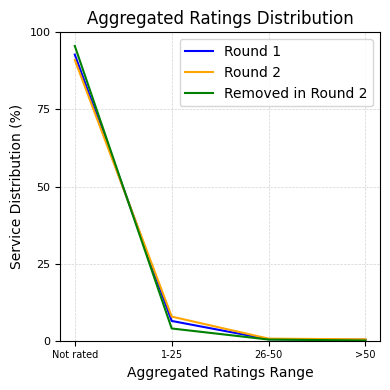

In [16]:
import matplotlib.pyplot as plt
import mysql.connector

# Connect to MySQL - rapAPI
cnx_rapAPI = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI'
)
cursor_rapAPI = cnx_rapAPI.cursor()

# Execute the query to select latency ranges and count of services within each range for rapAPI
query = """
    SELECT 
        CASE
            WHEN ad.ratings_votes IS NULL THEN 'Not rated'
            WHEN ad.ratings_votes = 0 THEN 'Not rated'
            WHEN ad.ratings_votes >= 1 AND ad.ratings_votes < 26 THEN '1-25'
            WHEN ad.ratings_votes >= 26 AND ad.ratings_votes < 51 THEN '26-50'
            WHEN ad.ratings_votes > 50 THEN '>50'
        END AS followers_range,
        COUNT(*) AS service_count 
    FROM 
        api_details ad 
    GROUP BY 
        followers_range
"""
cursor_rapAPI.execute(query)
latency_data_rapAPI = cursor_rapAPI.fetchall()

# Extract latency ranges and service count values from the result for rapAPI
latency_ranges_rapAPI = []
service_count_values_rapAPI = []
for latency_range, service_count in latency_data_rapAPI:
    if latency_range is not None:  
        latency_ranges_rapAPI.append(latency_range)
        service_count_values_rapAPI.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI
latency_ranges_sorted_rapAPI = ['Not rated', '1-25', '26-50', '>50']
service_count_values_sorted_rapAPI = [service_count_values_rapAPI[latency_ranges_rapAPI.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI]

# Close connection to rapAPI
cursor_rapAPI.close()
cnx_rapAPI.close()

# Connect to MySQL - rapAPI2
cnx_rapAPI2 = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Execute the same query for rapAPI2 database
cursor_rapAPI2.execute(query)
latency_data_rapAPI2 = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2 = []
service_count_values_rapAPI2 = []
for latency_range, service_count in latency_data_rapAPI2:
    if latency_range is not None:  
        latency_ranges_rapAPI2.append(latency_range)
        service_count_values_rapAPI2.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2 = ['Not rated', '1-25', '26-50', '>50']
service_count_values_sorted_rapAPI2 = [service_count_values_rapAPI2[latency_ranges_rapAPI2.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2]


query_removed = """
    SELECT
    CASE
            WHEN ad.ratings_votes IS NULL THEN 'Not rated'
            WHEN ad.ratings_votes = 0 THEN 'Not rated'
            WHEN ad.ratings_votes >= 1 AND ad.ratings_votes < 26 THEN '1-25'
            WHEN ad.ratings_votes >= 26 AND ad.ratings_votes < 51 THEN '26-50'
            WHEN ad.ratings_votes > 100 THEN '>50'
    END AS followers_range,
    COUNT(*) AS latency_count
FROM
    rapAPI.api_details ad
WHERE
    ad.base_url NOT IN (
        SELECT base_url FROM rapAPI2.api_details WHERE base_url IS NOT NULL
    ) 
GROUP BY
    followers_range;

"""

cursor_rapAPI2.execute(query_removed)
latency_data_rapAPI2_removed = cursor_rapAPI2.fetchall()

# Extract latency ranges and service count values from the result for rapAPI2
latency_ranges_rapAPI2_removed = []
service_count_values_rapAPI2_removed = []
for latency_range, service_count in latency_data_rapAPI2_removed:
    if latency_range is not None:  
        latency_ranges_rapAPI2_removed.append(latency_range)
        service_count_values_rapAPI2_removed.append(service_count)

# Sort the latency ranges and service count values based on the predefined order for rapAPI2
latency_ranges_sorted_rapAPI2_removed = ['Not rated', '1-25', '26-50', '>50']
service_count_values_sorted_rapAPI2_removed = [service_count_values_rapAPI2_removed[latency_ranges_rapAPI2_removed.index(latency_range)] for latency_range in latency_ranges_sorted_rapAPI2_removed]


# Calculate total counts for each round
total_rapAPI = sum(service_count_values_sorted_rapAPI)
total_rapAPI2 = sum(service_count_values_sorted_rapAPI2)
total_removed = sum(service_count_values_sorted_rapAPI2_removed)

# Calculate percentages for each round
percentage_rapAPI = [count / total_rapAPI * 100 for count in service_count_values_sorted_rapAPI]
percentage_rapAPI2 = [count / total_rapAPI2 * 100 for count in service_count_values_sorted_rapAPI2]
percentage_removed = [count / total_removed * 100 for count in service_count_values_sorted_rapAPI2_removed]

# Plot graph
plt.figure(figsize=(4, 4))

# Create line graph for rapAPI
plt.plot(latency_ranges_sorted_rapAPI, percentage_rapAPI, color='blue', linestyle='-', label='Round 1')

# Create line graph for rapAPI2
plt.plot(latency_ranges_sorted_rapAPI2, percentage_rapAPI2, color='orange', linestyle='-', label='Round 2')

plt.plot(latency_ranges_sorted_rapAPI2_removed, percentage_removed, color='green', linestyle='-', label='Removed in Round 2')

# Add labels and title
plt.xlabel('Aggregated Ratings Range')
plt.ylabel('Service Distribution (%)')
plt.title('Aggregated Ratings Distribution')

# Set y-axis limit
plt.ylim(0, 100)
plt.yticks(range(0, 101, 25))

# Show plot
plt.xticks(fontsize=7) 
plt.yticks(fontsize=8) 

plt.tight_layout()  
plt.legend()  
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.grid(True, linestyle='--', linewidth=0.5, color='lightgray')
plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_AggRatings.pdf', format='pdf')


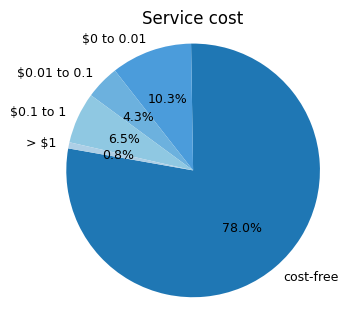

In [20]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL
cnx = mysql.connector.connect(
    host='xxx',
    user='xxx',
    password='xxx',
    database='rapAPI2'
)

# Create a cursor
cursor = cnx.cursor()

# SQL query
query = """
SELECT 
    CASE 
        WHEN calculated_value = 0 THEN 'cost-free'
        WHEN calculated_value > 0 AND calculated_value <= 0.01 THEN '$0 to 0.01'
        WHEN calculated_value > 0.01 AND calculated_value <= 0.1 THEN '$0.01 to 0.1'
        WHEN calculated_value > 0.1 AND calculated_value <= 1 THEN '$0.1 to 1'
        ELSE '> $1'
    END AS pricing_range
FROM 
    (SELECT 
        base_url,  
        CASE 
            WHEN basic_per_req_cost IS NOT NULL THEN basic_per_req_cost
            ELSE basic / basic_req
        END AS calculated_value 
    FROM 
        api_pricing 
    WHERE 
        basic = 0 
        AND (basic_per_req_cost IS NOT NULL OR (basic_per_req_cost IS NULL AND basic_req IS NOT NULL))) AS subquery;
"""

# Execute the query
cursor.execute(query)

# Fetch all the results
results = cursor.fetchall()

# Close cursor and connection
cursor.close()
cnx.close()

# Process the fetched data
pricing_counts = {}
total_services = 0
for row in results:
    pricing_range = row[0]
    if pricing_range in pricing_counts:
        pricing_counts[pricing_range] += 1
    else:
        pricing_counts[pricing_range] = 1
    total_services += 1

# Define the order of pricing ranges as per SQL query sequence
order = [
    'cost-free',
    '$0 to 0.01',
    '$0.01 to 0.1',
    '$0.1 to 1',
    '> $1'
]

# Reorder labels and sizes based on defined order
labels = [label for label in order if label in pricing_counts]
sizes = [pricing_counts[label] for label in order]

# Calculate percentage for each pricing range
percentages = {k: (v / total_services) * 100 for k, v in zip(labels, sizes)}

# Plot the data as a pie chart with shades of blue
colors = ['#1f77b4', '#4b9cdb', '#6cb1de', '#8fc8e2', '#adcfe6']  # Five shades of blue

plt.figure(figsize=(3.6, 3.6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=170, colors=colors, textprops={'fontsize': 9})

plt.title('Service cost')
plt.axis('equal')

plt.savefig(r'D:\RapidAPI\RapidAPI\RapidAPI_Pricing.pdf', format='pdf')

plt.show()


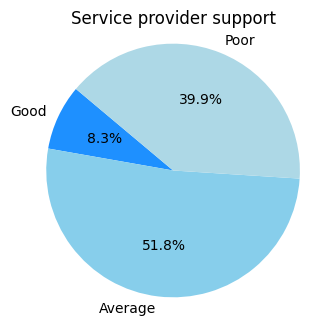

In [292]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL connection parameters
mysql_config = {
    host='xxx',
    user='xxx',
    password='xxx',,
    database: rapAPI2
}

# Establish MySQL connection
cnx_rapAPI2 = mysql.connector.connect(**mysql_config)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Define queries
queries = [
    "SELECT COUNT(base_url) FROM api_details WHERE documentation > 100 AND resources != ''",
    "SELECT COUNT(base_url) FROM api_details WHERE ((documentation >= 100 AND resources = '') OR (documentation < 100 AND resources != ''))",
    "SELECT COUNT(base_url) FROM api_details WHERE documentation < 100 AND resources = ''"
]

# Execute queries
counts = []
for query in queries:
    cursor_rapAPI2.execute(query)
    count = cursor_rapAPI2.fetchone()[0]
    counts.append(count)

# Close MySQL connection
cursor_rapAPI2.close()
cnx_rapAPI2.close()
plt.figure(figsize=(3.6, 3.6))

# Pie chart
labels = ['Good', 'Average', 'Poor']
colors = ['dodgerblue', 'skyblue', 'lightblue']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Service provider support')
plt.savefig(r'xx\Desktop\RapidAPI\RapidAPI_Documentation.pdf', format='pdf')
plt.show()


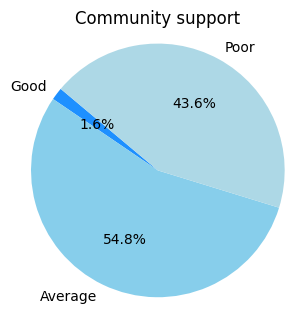

In [293]:
import mysql.connector
import matplotlib.pyplot as plt

# MySQL connection parameters
mysql_config = {
    host='xxx',
    user='xxx',
    password='xxx',
    database: 'rapAPI2'
}

# Establish MySQL connection
cnx_rapAPI2 = mysql.connector.connect(**mysql_config)
cursor_rapAPI2 = cnx_rapAPI2.cursor()

# Define queries
queries = [
    "SELECT COUNT(base_url) FROM api_details WHERE support_weight >= 100",
    "SELECT COUNT(base_url) FROM api_details WHERE  support_weight between 0 and 100",
    "SELECT COUNT(base_url) FROM api_details WHERE support_weight = 0"
]

# Execute queries
counts = []
for query in queries:
    cursor_rapAPI2.execute(query)
    count = cursor_rapAPI2.fetchone()[0]
    counts.append(count)

# Close MySQL connection
cursor_rapAPI2.close()
cnx_rapAPI2.close()
plt.figure(figsize=(3.6, 3.6))

# Pie chart
labels = ['Good', 'Average', 'Poor']
colors = ['dodgerblue', 'skyblue', 'lightblue']
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Community support')
plt.savefig(r'xx\Desktop\RapidAPI\RapidAPI_CommunitySupport.pdf', format='pdf')

plt.show()
